In [8]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [9]:
df = pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
5,2002-05-31,1.078571,1.078571,1.071429,1.076429,1.076429,8464400


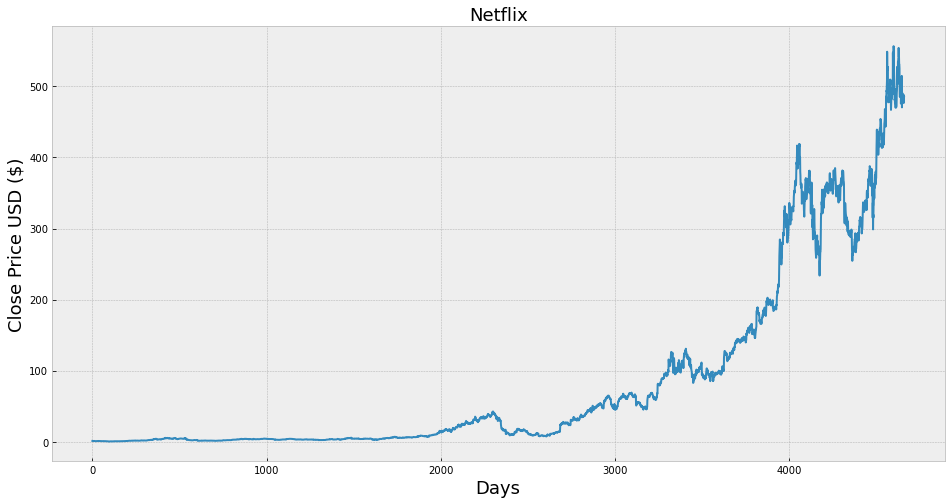

In [10]:
plt.figure(figsize=(16,8))
plt.title('Netflix', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(df['Close'])
plt.show()

In [11]:
df = df[['Close']]
df.head(4)

,Close
0,1.196429
1,1.210000
2,1.157143
3,1.103571


In [12]:
#Create a variable to predict 'x' days out into the future
future_days = 20
#Create a new column (the target or dependent variable) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
#print the data
df.tail(4)

,Close,Prediction
4658,488.239990,NaN
4659,476.619995,NaN
4660,482.880005,NaN
4661,485.000000,NaN


In [13]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[  1.196429]
 [  1.21    ]
 [  1.157143]
 ...
 [488.23999 ]
 [488.929993]
 [486.23999 ]]


In [14]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[  0.979286   0.978571   0.964286 ... 476.619995 482.880005 485.      ]


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [16]:
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [17]:
#Get the feature data, 
#AKA all the rows from the original data set except the last 'x' days
x_future = df.drop(['Prediction'], 1)[:-future_days]
#Get the last 'x' rows
x_future = x_future.tail(future_days) 
#Convert the data set into a numpy array
x_future = np.array(x_future)
x_future

array([[527.51001 ],
       [503.059998],
       [520.650024],
       [505.869995],
       [534.659973],
       [531.789978],
       [539.440002],
       [539.809998],
       [554.090027],
       [541.450012],
       [541.940002],
       [530.789978],
       [530.719971],
       [525.419983],
       [489.049988],
       [485.230011],
       [488.279999],
       [488.23999 ],
       [488.929993],
       [486.23999 ]])

In [18]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print( tree_prediction )
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[504.209991 475.73999  484.119995 487.220001 496.950012 513.76001
 514.72998  514.72998  480.23999  490.76001  490.76001  482.839996
 479.100006 480.630005 482.880005 484.670013 488.23999  476.619995
 482.880005 485.      ]

[535.65588084 510.8757467  528.70327185 513.72368406 542.90238208
 539.99363663 547.74695066 548.12194231 562.59477914 549.78409965
 550.28070546 538.98013471 538.90918248 533.53763446 496.67657464
 492.80502061 495.89618931 495.85564011 496.55495948 493.82863627]


<ipython-input-19-86e94c1da7a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices


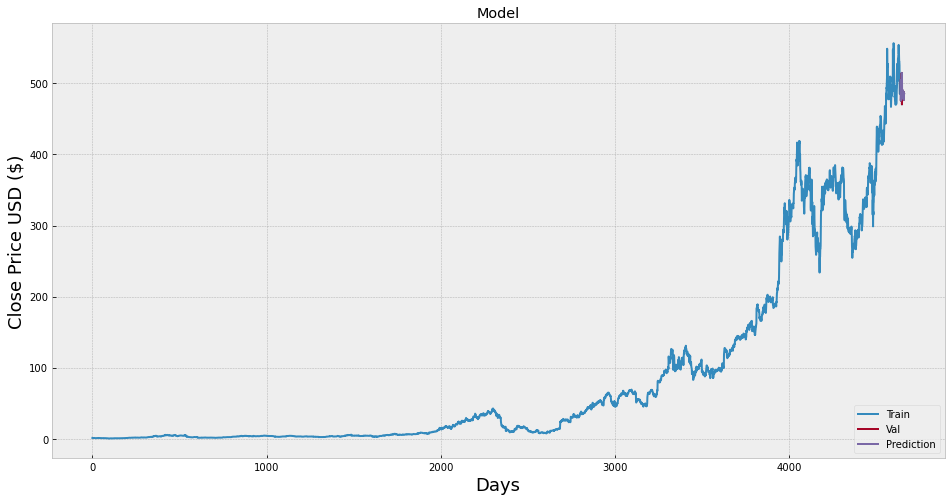

In [19]:
#Visualize the data
predictions = tree_prediction
#Plot the data
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()

<ipython-input-20-3c4519ef8805>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices


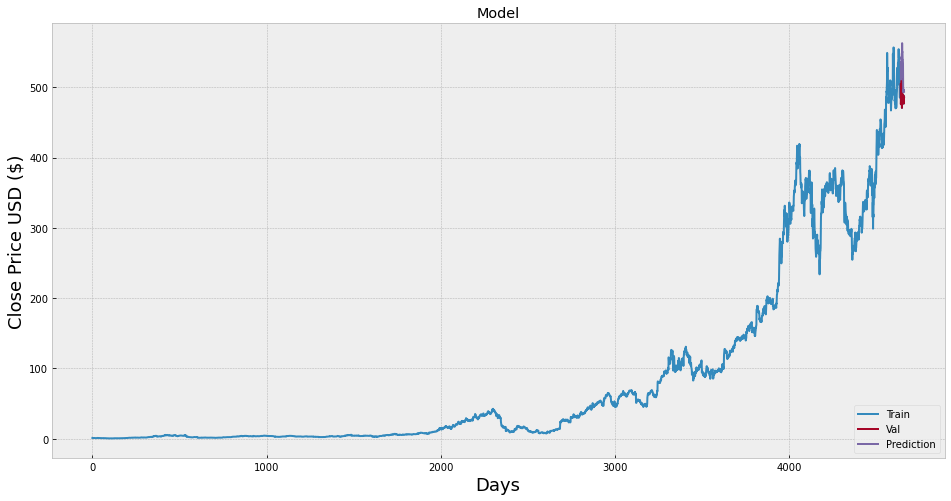

In [20]:
#Visualize the data
predictions = lr_prediction
#Plot the data
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()